In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
def generate_insurance_data(num_records=1000):
    np.random.seed(42)
    provinces = ['Province_A', 'Province_B', 'Province_C']
    genders = ['Male', 'Female']
    
    claim_rates_province = {
        'Province_A': 0.1,
        'Province_B': 0.9,
        'Province_C': 0.2
    }
    
    claim_rates_gender = {
        'Male': 0.6,
        'Female': 0.2
    }
    
    province_choices = np.random.choice(provinces, num_records)
    gender_choices = np.random.choice(genders, num_records)
    
    claims = [1 if np.random.rand() < claim_rates_gender[gender] else 0 for gender in gender_choices]
    
    data = {
        'Province': province_choices,
        'Gender': gender_choices,
        'Claimed': claims
    }
    
    return pd.DataFrame(data)

def save_data_to_csv(data, filename='insurance_data.csv'):
    save_path = r'C:\Users\Yibabe\Desktop\kifiyaAIMweek-3\data'
    os.makedirs(save_path, exist_ok=True)
    data.to_csv(os.path.join(save_path, filename), index=False)

def preprocessing_cripts(data):
    contingency_table = pd.crosstab(data['Province'], data['Claimed'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, contingency_table

def gender_analysis(data):
    male_claims = data[data['Gender'] == 'Male']['Claimed']
    female_claims = data[data['Gender'] == 'Female']['Claimed']
    t_stat, p_value = ttest_ind(male_claims, female_claims, equal_var=False)
    return t_stat, p_value

def save_insurance_data_to_csv(text_file_path, csv_file_name='insurance_text_data.csv'):
    df = pd.read_csv(text_file_path, delimiter='|')
    save_path = r'C:\Users\Yibabe\Desktop\kifiyaAIMweek-3\data'
    os.makedirs(save_path, exist_ok=True)
    csv_file_path = os.path.join(save_path, csv_file_name)
    df.to_csv(csv_file_path, index=False)
    print(f"Data saved to {csv_file_path}")


In [6]:
text_file_path = r'C:\Users\Yibabe\Downloads\MachineLearningRating_v3.txt'

# Save the insurance data from the text file to a CSV file
save_insurance_data_to_csv(text_file_path)


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_3496\1944191395.py:47: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, delimiter='|')


Data saved to C:\Users\Yibabe\Desktop\kifiyaAIMweek-3\data\insurance_text_data.csv


In [4]:
# Generate synthetic insurance data
insurance_data = generate_insurance_data()

# Save the generated data as a CSV
save_data_to_csv(insurance_data)


In [7]:

import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [8]:
from preprocessing_script import save_insurance_data_to_csv

In [9]:
# Load the data
csv_file_path = '../data/insurance_text_data.csv' 
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_3496\2275916377.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [14]:
df.shape

(1000098, 52)

In [17]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [10]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics:")
df.describe()


Descriptive Statistics:


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [11]:
# Check data types of each column
print("Data Types:")
df.dtypes


Data Types:


UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [10]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

In [11]:
# Fill missing values for categorical columns with the most frequent value or "Unknown"
categorical_cols = ['Province', 'Gender', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Country', 'MainCrestaZone', 'SubCrestaZone', 'VehicleType', 'make', 'Model', 'AlarmImmobiliser', 'TrackingDevice', 'CoverCategory', 'CoverType', 'CoverGroup', 'Product']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')



In [12]:
# List of numerical columns
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CapitalOutstanding']

# Step 1: Identify columns with non-numeric values
for col in numerical_cols:
    invalid_entries = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()
    if invalid_entries > 0:
        print(f"Column '{col}' has {invalid_entries} non-numeric entries.")

# Step 2: Convert numerical columns to numeric, replacing invalid entries with NaN
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Fill missing values (NaNs) with the median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Check the data again to ensure it has been cleaned




Column 'CapitalOutstanding' has 322 non-numeric entries.


In [26]:
df[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 5 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   TotalPremium              1000098 non-null  float64
 1   TotalClaims               1000098 non-null  float64
 2   SumInsured                1000098 non-null  float64
 3   CalculatedPremiumPerTerm  1000098 non-null  float64
 4   CapitalOutstanding        1000098 non-null  float64
dtypes: float64(5)
memory usage: 38.2 MB


In [13]:
# Handle missing dates by filling with median date or business logic
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])
df['VehicleIntroDate'] = df['VehicleIntroDate'].fillna(df['VehicleIntroDate'].median())


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_3496\3263601952.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])


In [14]:
# Fill missing values for binary columns with the mode
binary_cols = ['IsVATRegistered', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder']
df[binary_cols] = df[binary_cols].fillna(df[binary_cols].mode().iloc[0])


In [15]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [31]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,CapitalOutstanding,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,1000098,2.204560e+05,1.000098e+06,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2008-04-21 04:54:04.261262080,2.255311e+05,5.258828e+04,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,1977-10-01 00:00:00,2.000000e+04,-2.000000e+00,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,2007-11-01 00:00:00,1.350000e+05,0.000000e+00,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2010-10-01 00:00:00,2.200000e+05,0.000000e+00,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2012-04-01 00:00:00,2.800000e+05,0.000000e+00,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2014-09-01 00:00:00,2.655000e+07,7.000000e+05,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,NaN,5.645157e+05,1.114033e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03


In [16]:
df1= df

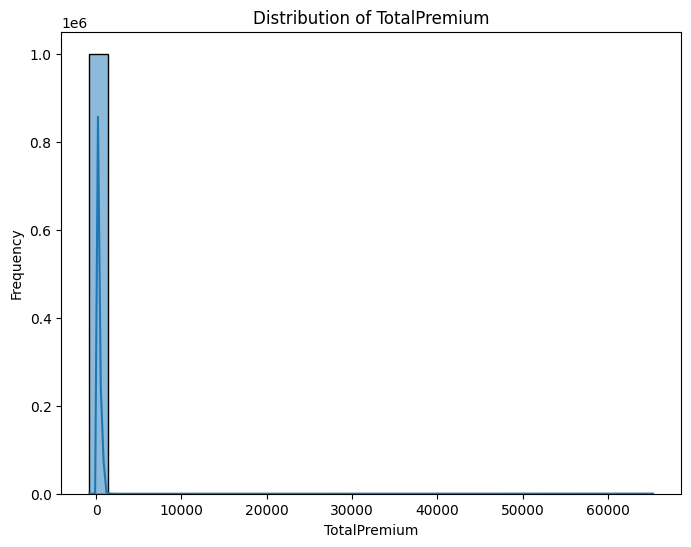

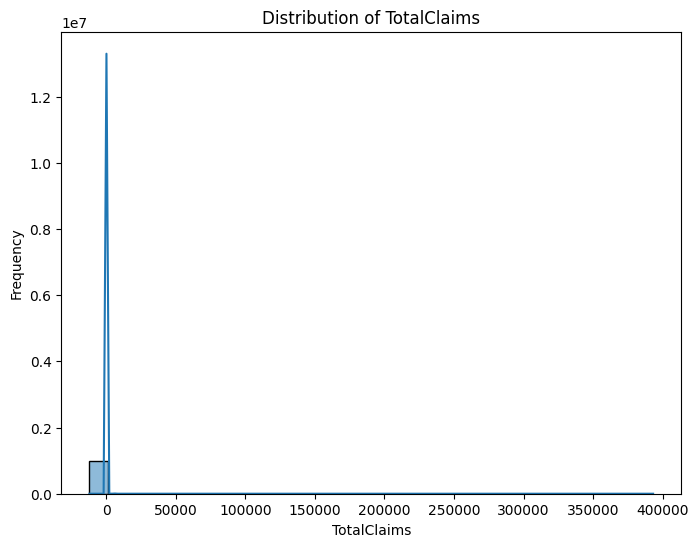

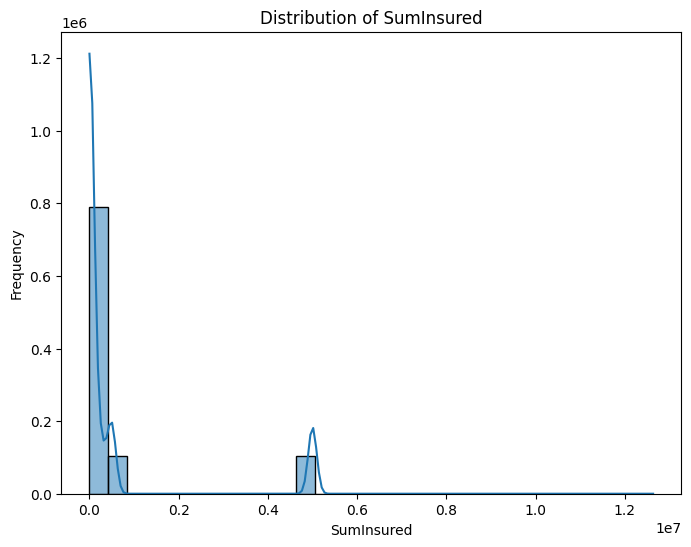

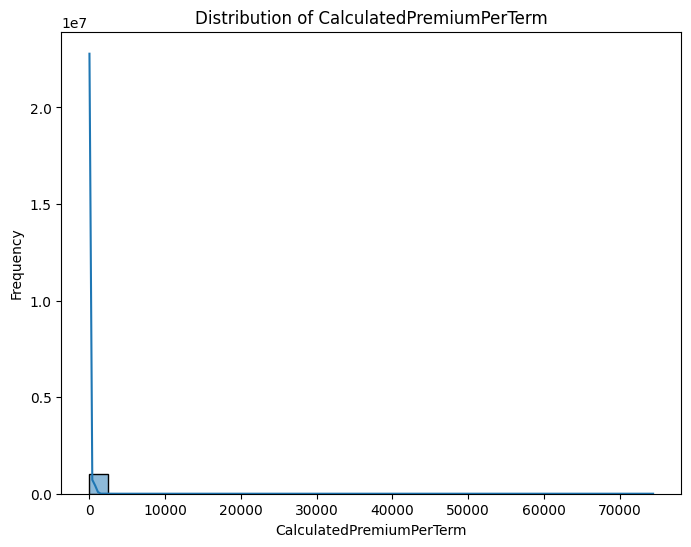

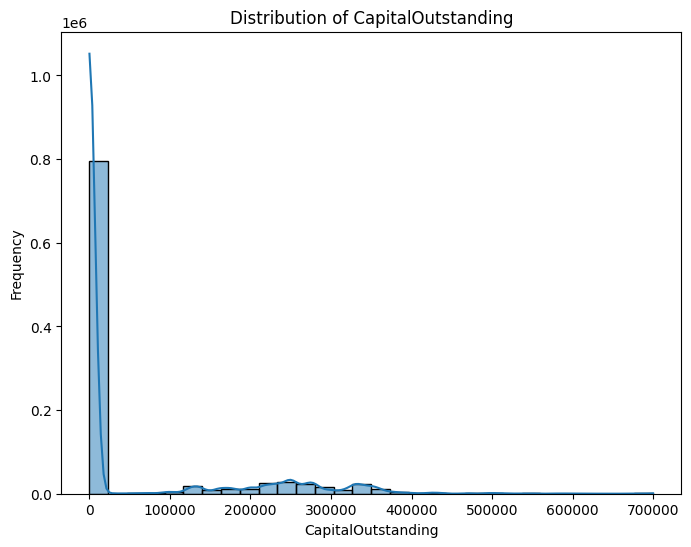

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CapitalOutstanding']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


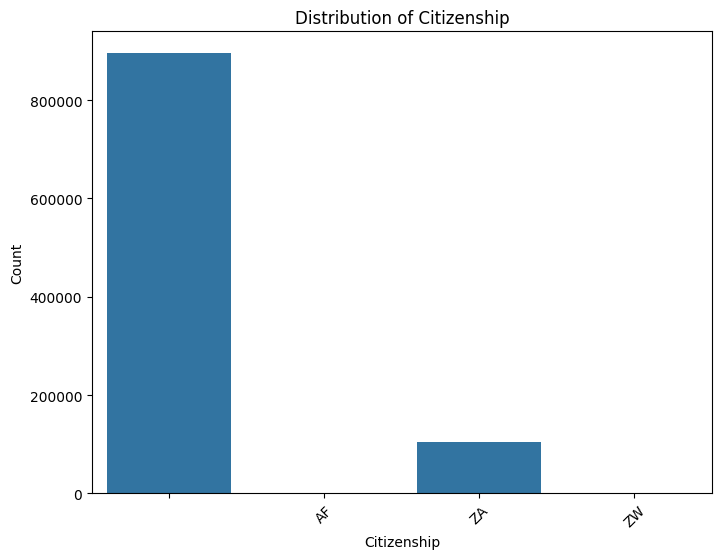

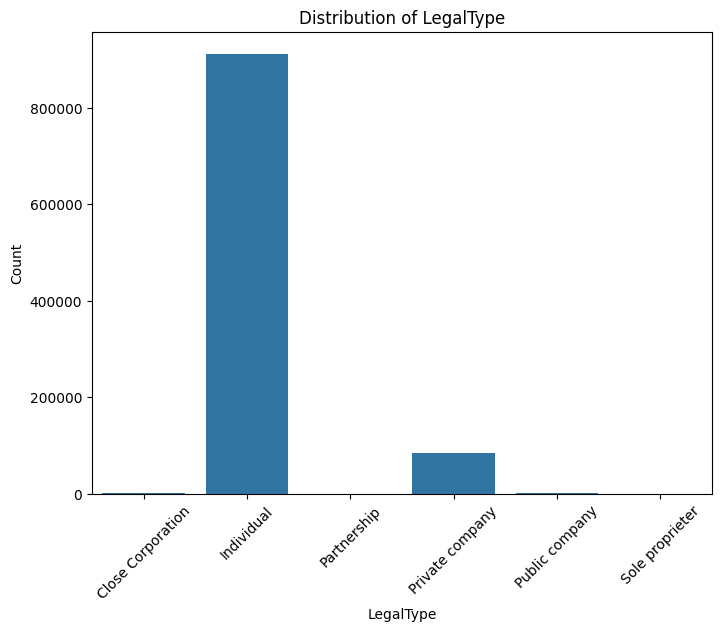

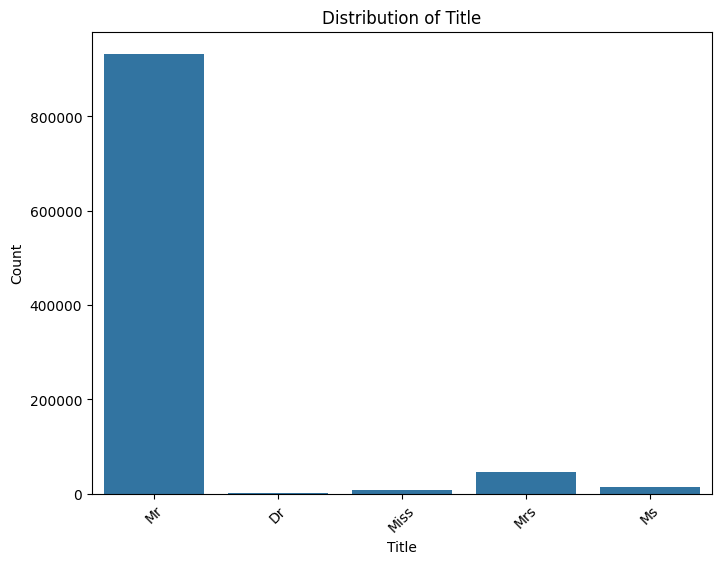

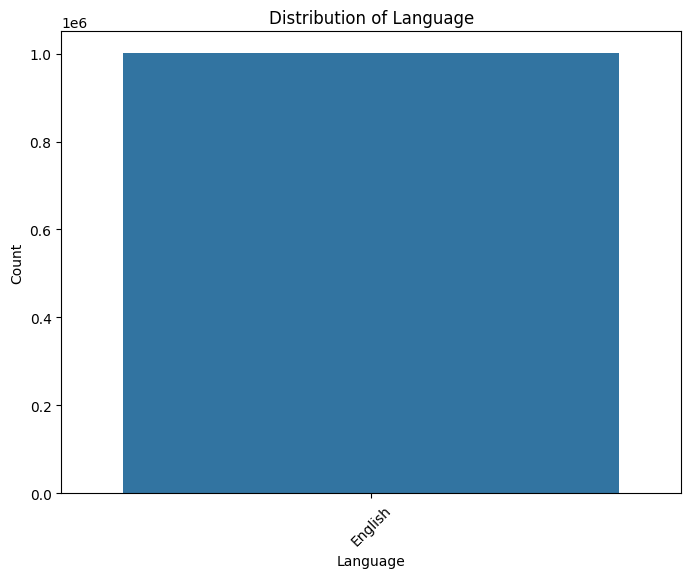

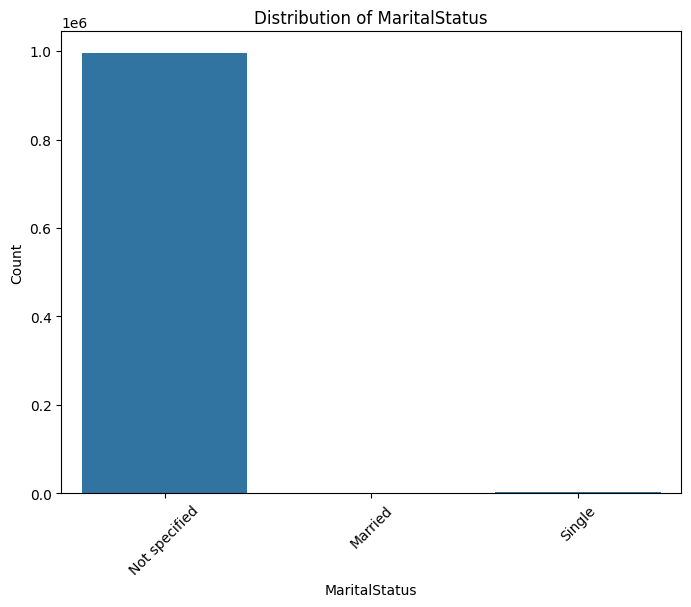

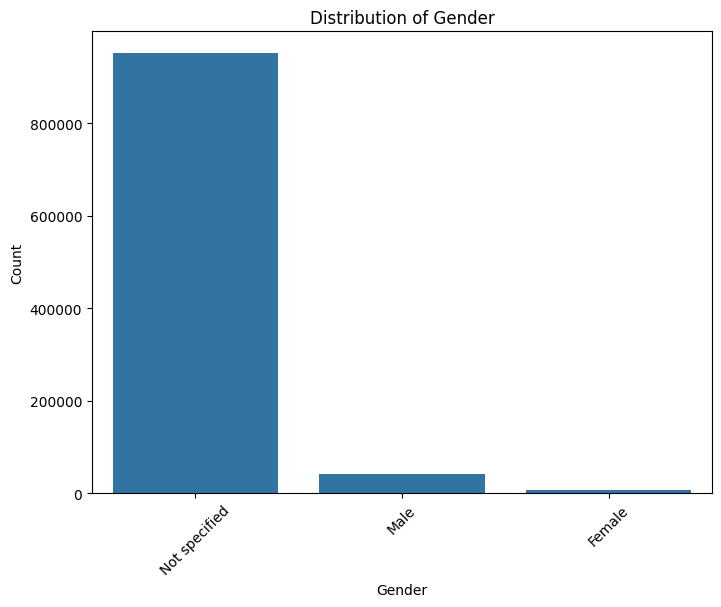

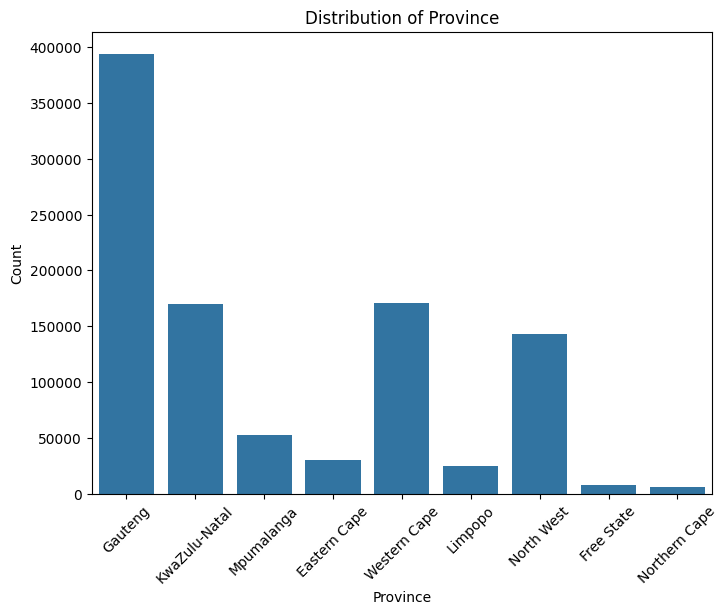

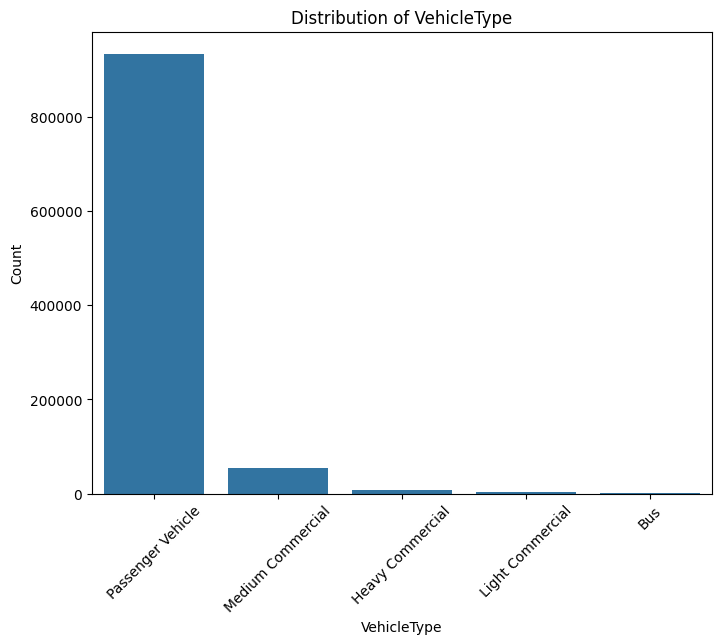

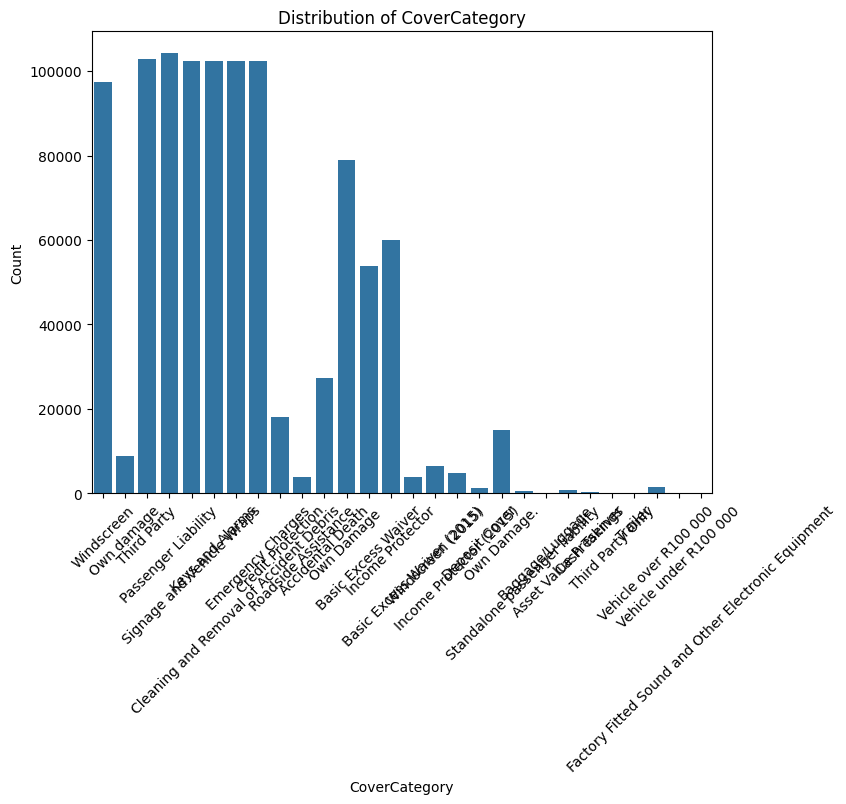

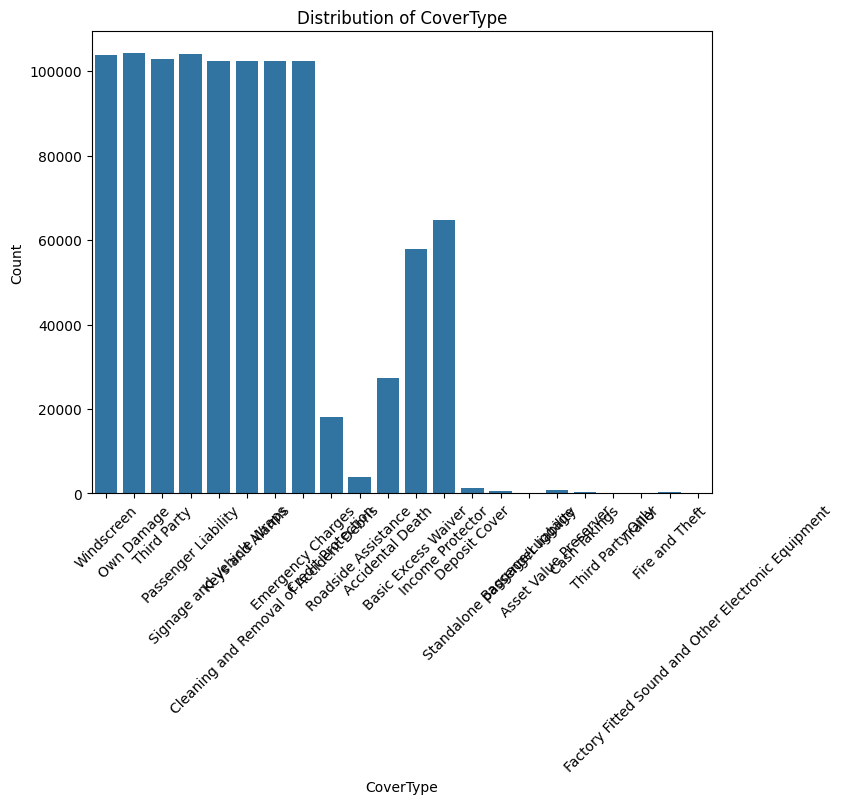

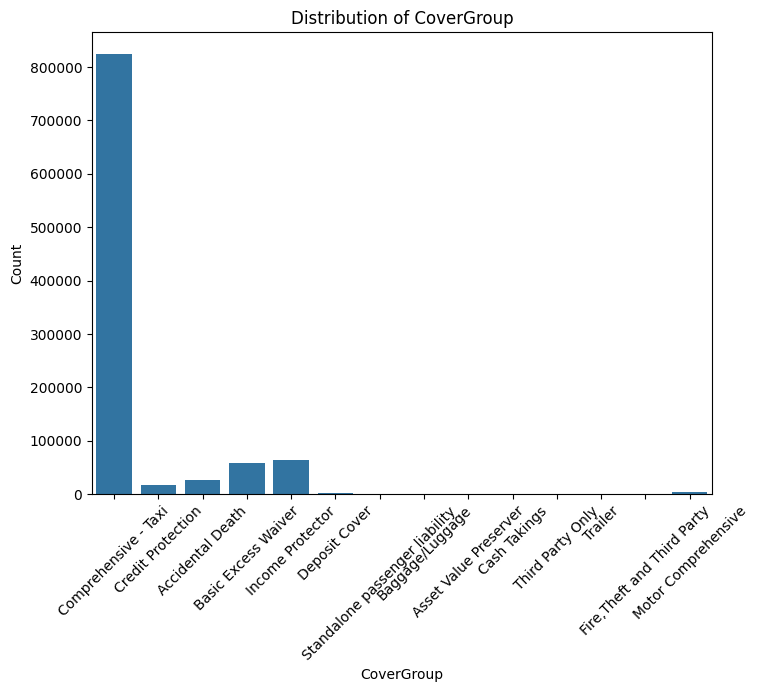

In [38]:
# Plot bar charts for categorical columns
categorical_cols = ['Citizenship', 'LegalType', 'Title', 'Language', 'MaritalStatus', 'Gender', 'Province', 'VehicleType', 'CoverCategory', 'CoverType', 'CoverGroup']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df1)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


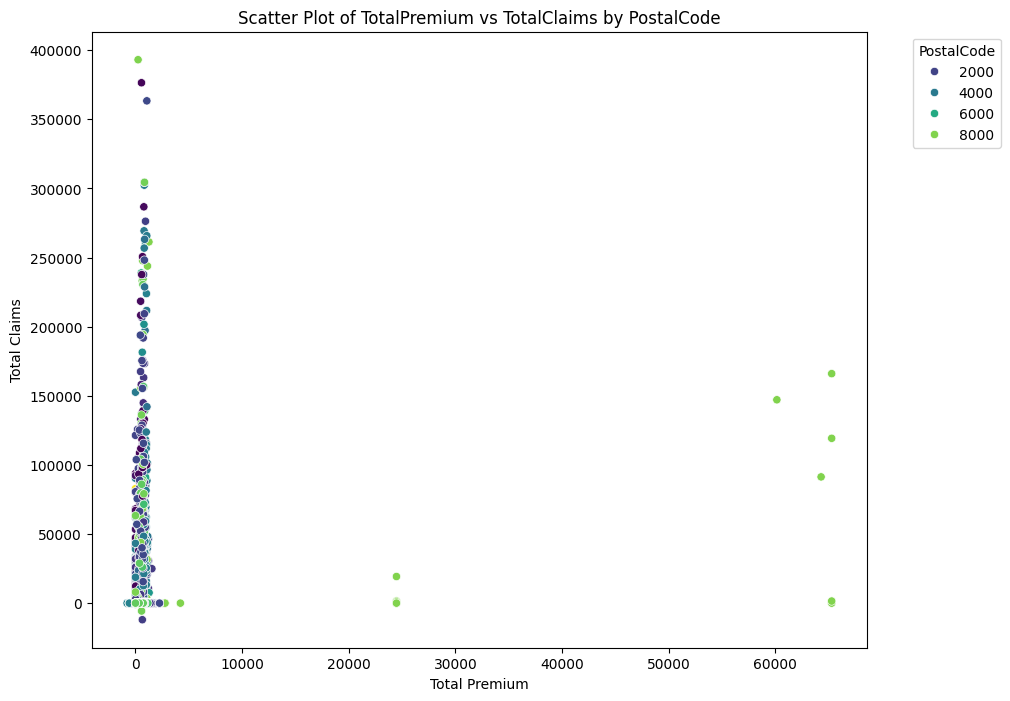

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of TotalPremium vs TotalClaims colored by PostalCode
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=df1, palette='viridis')
plt.title('Scatter Plot of TotalPremium vs TotalClaims by PostalCode')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')  # To display the legend outside the plot
plt.show()


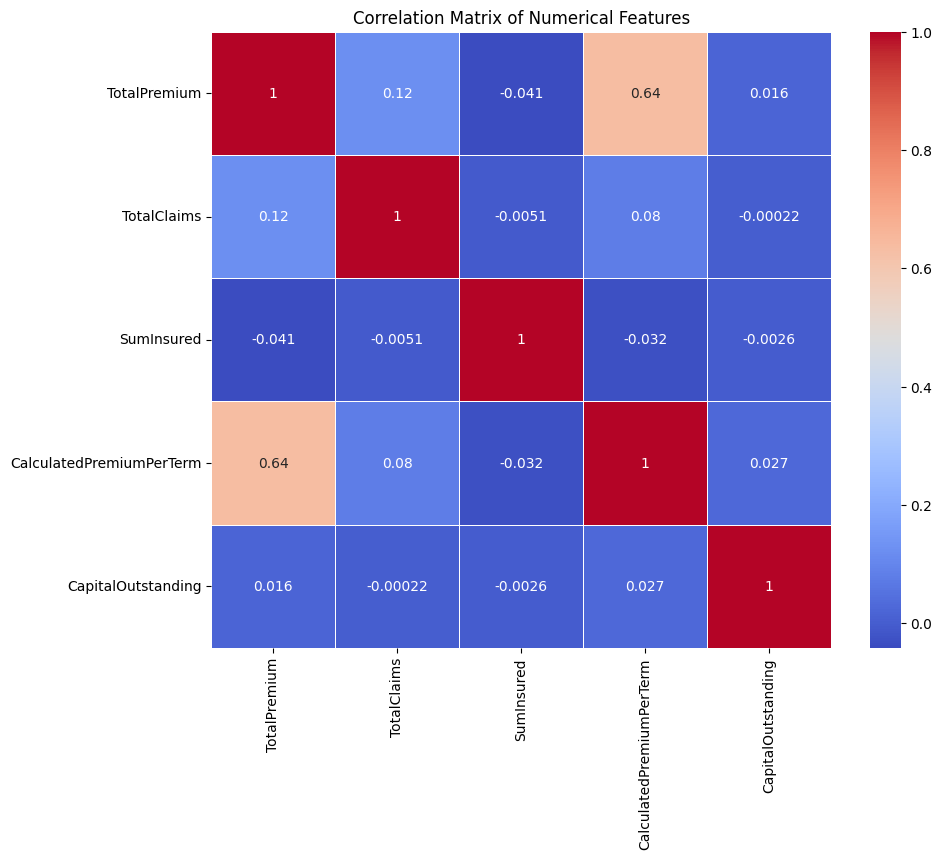

In [19]:
# Select numerical columns for correlation matrix
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CapitalOutstanding']

# Calculate the correlation matrix
correlation_matrix = df1[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [21]:
# Scatter plot of TotalPremium vs TotalClaims, grouped by PostalCode
g = sns.FacetGrid(df1, col="PostalCode", col_wrap=4, height=4)
g.map(sns.scatterplot, 'TotalPremium', 'TotalClaims')
g.set_titles(col_template="{col_name}")
plt.show()


Trends in Insurance Cover Type by Geography

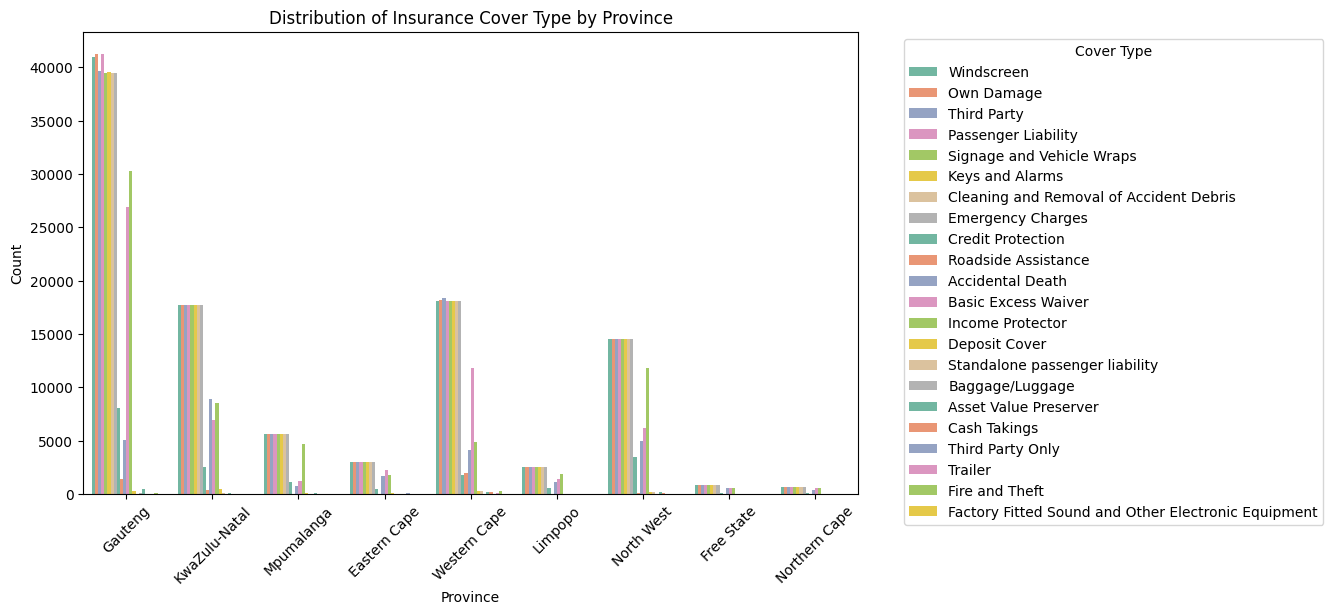

In [22]:
# Plot the distribution of CoverType by Province
plt.figure(figsize=(10, 6))
sns.countplot(x='Province', hue='CoverType', data=df1, palette='Set2')
plt.title('Distribution of Insurance Cover Type by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show() 


In [ ]:
Trends in Premium by Geography

C:\Users\Yibabe\AppData\Local\Temp\ipykernel_3496\3289957824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='TotalPremium', data=premium_by_province, palette='coolwarm')


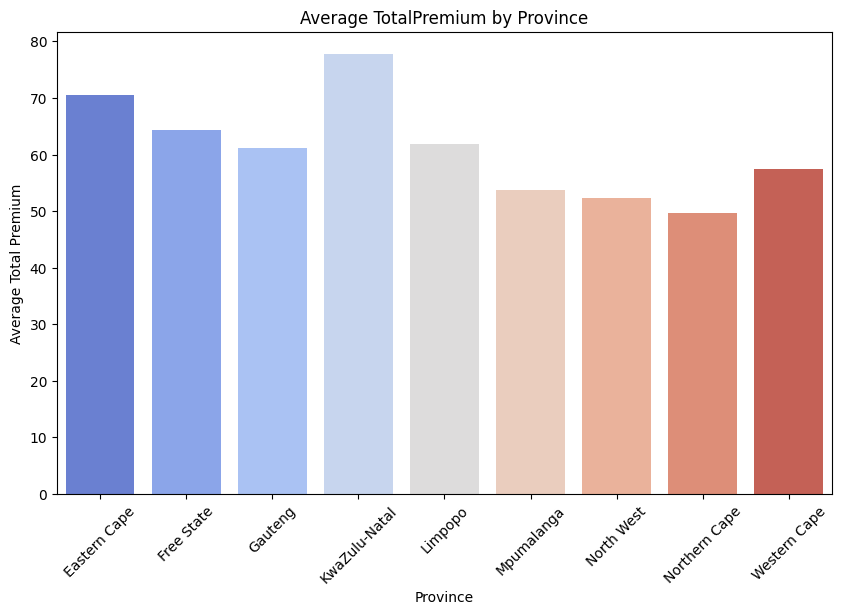

In [23]:
# Group by Province and calculate the average TotalPremium
premium_by_province = df1.groupby('Province')['TotalPremium'].mean().reset_index()

# Plot the average TotalPremium by Province
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='TotalPremium', data=premium_by_province, palette='coolwarm')
plt.title('Average TotalPremium by Province')
plt.xlabel('Province')
plt.ylabel('Average Total Premium')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Trends in Auto Make by Geography

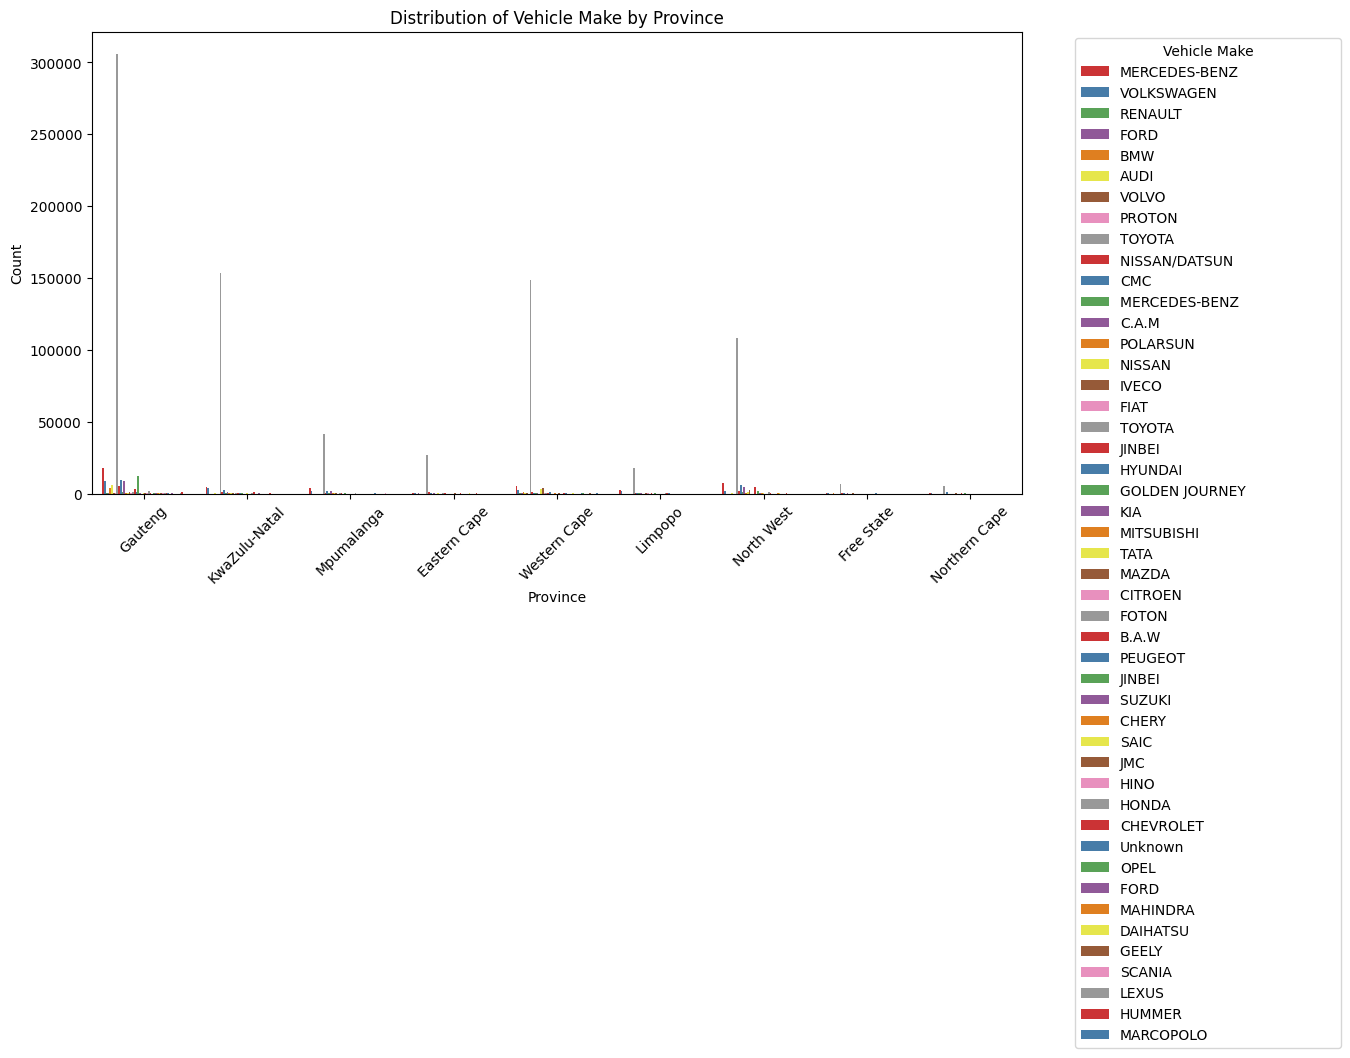

In [24]:
# Plot the distribution of vehicle make by Province
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', hue='make', data=df1, palette='Set1')
plt.title('Distribution of Vehicle Make by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [ ]:
 Outlier Detection Using Box Plots

C:\Users\Yibabe\AppData\Local\Temp\ipykernel_3496\2248138788.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, y=col, palette='Set3')
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_3496\2248138788.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, y=col, palette='Set3')
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_3496\2248138788.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, y=col, palette='Set3')
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_3496\2248138788.py:8: FutureWarning: 

Passing `palette` without

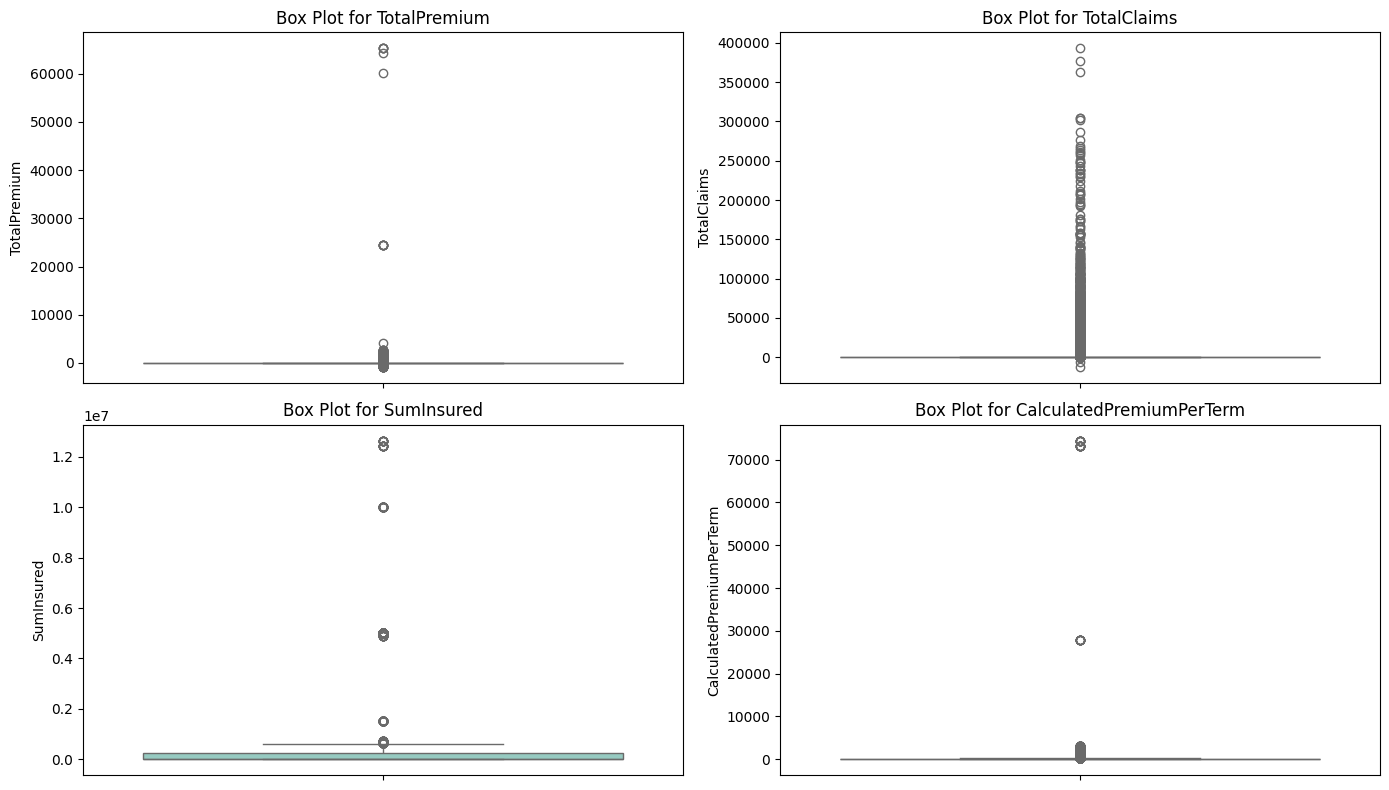

In [25]:
# List of numerical columns to check for outliers
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']

# Create box plots for numerical columns
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df1, y=col, palette='Set3')
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()


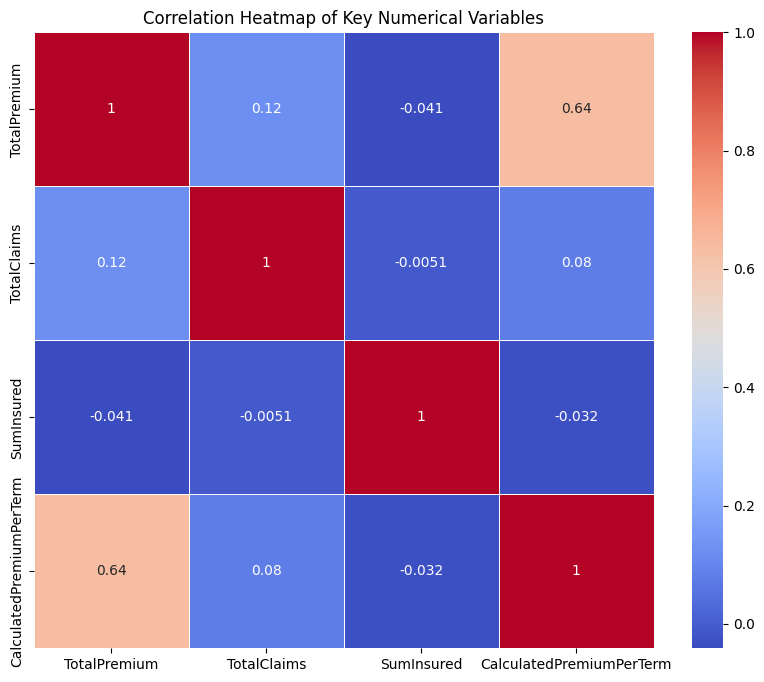

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Numerical Variables')
plt.show()


In [ ]:
 Geographic Distribution of Total Premiums (Bar Plot by Province)

C:\Users\Yibabe\AppData\Local\Temp\ipykernel_3496\1856772126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='TotalPremium', data=premium_by_province, palette='viridis')


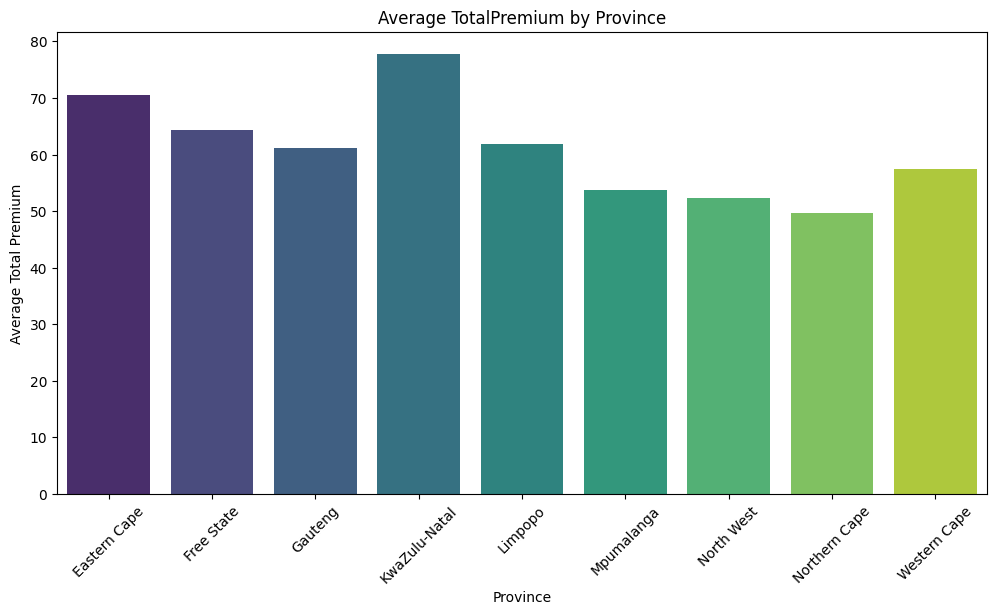

In [27]:
# Average TotalPremium by Province
premium_by_province = df1.groupby('Province')['TotalPremium'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalPremium', data=premium_by_province, palette='viridis')
plt.title('Average TotalPremium by Province')
plt.xlabel('Province')
plt.ylabel('Average Total Premium')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Pair Plot of Numerical Features (Exploring Relationships)

c:\Users\Yibabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Yibabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Yibabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Yibabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Yibabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

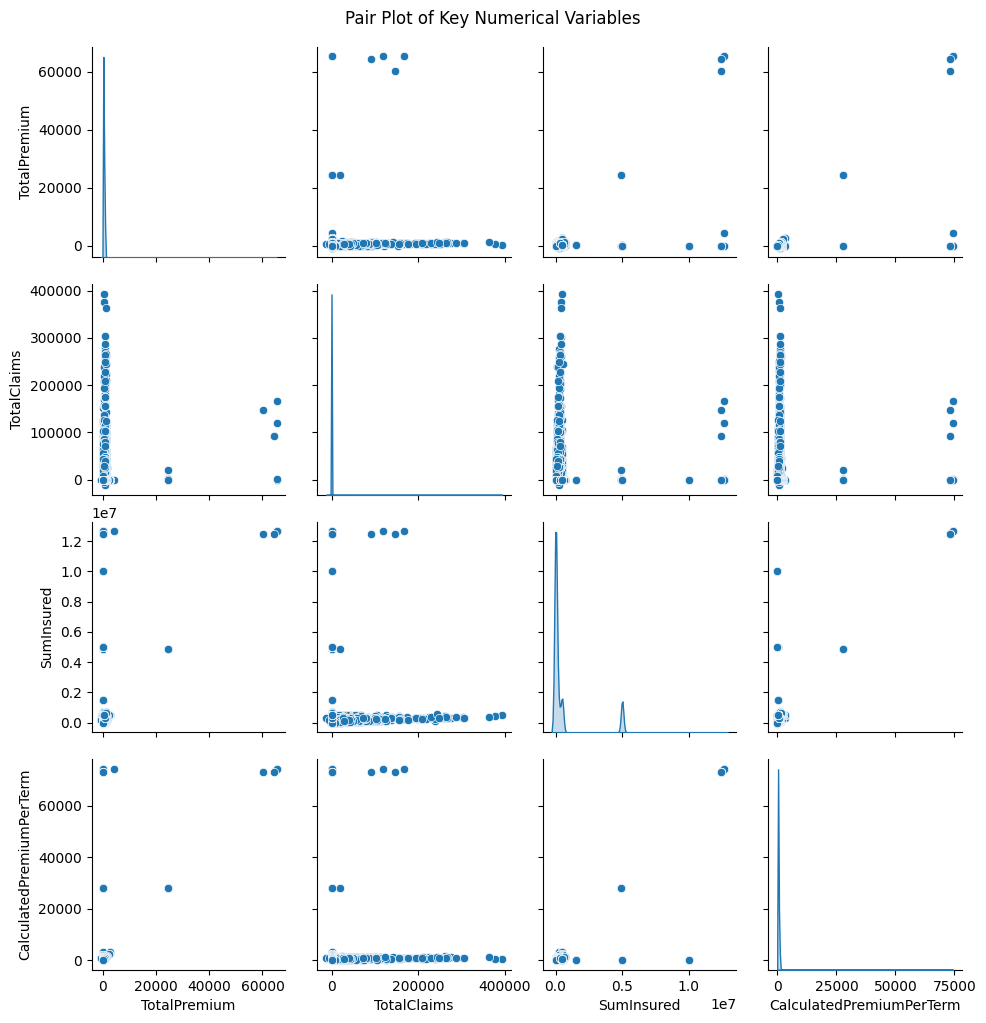

In [28]:
# Pair plot for selected numerical columns
sns.pairplot(df[numerical_columns], diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02)
plt.show()
